<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#[Profesores:-Steven-Van-Vaerenbergh,-Rodrigo-G.-Manzanas,-Joaquín-Bedia-y-Sixto-Herrera]" data-toc-modified-id="[Profesores:-Steven-Van-Vaerenbergh,-Rodrigo-G.-Manzanas,-Joaquín-Bedia-y-Sixto-Herrera]-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>[Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera]</a></span></li></ul></li><li><span><a href="#Introducción:-Reducción-de-la-Dimensión" data-toc-modified-id="Introducción:-Reducción-de-la-Dimensión-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción: Reducción de la Dimensión</a></span><ul class="toc-item"><li><span><a href="#PCAs-(función-prcomp)" data-toc-modified-id="PCAs-(función-prcomp)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCAs (función <a href="https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp" target="_blank">prcomp</a>)</a></span></li></ul></li><li><span><a href="#Tarea-2.-Problemas-de-Clasificación---Reducción-de-la-Dimensión" data-toc-modified-id="Tarea-2.-Problemas-de-Clasificación---Reducción-de-la-Dimensión-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tarea 2. Problemas de Clasificación - Reducción de la Dimensión</a></span><ul class="toc-item"><li><span><a href="#Punto-1-(3-puntos):" data-toc-modified-id="Punto-1-(3-puntos):-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Punto 1 (3 puntos):</a></span></li><li><span><a href="#Punto-2-(3-puntos):" data-toc-modified-id="Punto-2-(3-puntos):-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Punto 2 (3 puntos):</a></span></li><li><span><a href="#Punto-3-(2-puntos):" data-toc-modified-id="Punto-3-(2-puntos):-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Punto 3 (2 puntos):</a></span></li><li><span><a href="#Punto-4-(2-puntos):" data-toc-modified-id="Punto-4-(2-puntos):-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Punto 4 (2 puntos):</a></span></li></ul></li></ul></div>

# Minería de Datos (Master en Data Science, UIMP-UC) 
### [Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera]


## Introducción: Reducción de la Dimensión

En la presente tarea trabajaremos con datos de variables climáticas los cuales por lo general presentan una alta auto-correlación espacial, rangos muy diferenciados y correlación entre variables, entre otros "problemas" citados a lo largo del curso.

Como habéis visto en las sesiones de Reducción de la Dimensión con Técnicas No Lineales, estos métodos suelen ser un pre-proceso habitualmente aplicado para resolver dichos problemas. Es por ello que en parte de la presente tarea exploraremos dichas técnicas, sea en su versión lineal (PCAs) o no lineal (KPCAs). Para ello, en esta subsección introduciremos brevemente las funciones en R que aplican ambos métodos.

### PCAs (función [prcomp](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp))

El análisis de componentes principales (PCAs) está implementado en R a través de la función `prcomp` (`?prcomp`). Veamos como hacer uso de dicha función:

In [1]:
library("caret")
library("FNN")

Loading required package: ggplot2

Loading required package: lattice



In [1]:
library("readr")
mnist_data <- read_csv("./train.csv")
nrows <- 1000 # set number of rows to include. Max = 42000
PCA1 <- prcomp(mnist_data[1:nrows,(2:ncol(mnist_data))], center = TRUE, scale. = FALSE) # PCA with R
str(PCA1)

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



List of 5
 $ sdev    : num [1:784] 592 515 460 439 406 ...
 $ rotation: num [1:784, 1:784] -2.11e-18 8.88e-16 -3.33e-16 0.00 1.11e-16 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:784] "pixel0" "pixel1" "pixel2" "pixel3" ...
  .. ..$ : chr [1:784] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:784] "pixel0" "pixel1" "pixel2" "pixel3" ...
 $ scale   : logi FALSE
 $ x       : num [1:1000, 1:784] -629 1736 -841 -178 1960 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:784] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Como vemos la función devuelve un `data.frame` con los siguientes elementos:

 * `sdev`: Se corresponde con la desviación estándar asociada a cada componente principal.
 * `rotation`: Es la matriz de cambio de base, desde el espacio original al espacio de las CPs.
 * `center`: Es el vector de medias de las variables originales.
 * `scale`: Es el vector de desviaciones estándar de las variables originales. Junto con `center` son los elementos aplicados para normalizar las variables orginales.
 * `x`: Es la matriz con las coordenadas de los diferentes elementos de la muestra en el espacio de las CPs. En un modelo que utilice CPs serán, por tanto, las nuevas variables de entrada.

Una vez hemos obtenido las PCs y entrenado un modelo, para aplicar éste a nuevos datos (test) deberemos reproyectar los nuevos datos al espacio de las PCs con la función `predict`:

In [2]:
PCAtest <- predict(PCA1, newdata = mnist_data[1001:2000,(2:ncol(mnist_data))])

En el recurso `07 Reducción de la dimensión` incluido en el Moodle de la asignatura tienes toda la información detallada a este respecto.


## Tarea 2. Problemas de Clasificación - Reducción de la Dimensión

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

Considerad la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido. El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores originales. Para ello consideraremos el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Obtened el valor óptimo de `K` en cada rastreando valores entre 1 y 15, ¿cambia el valor óptimo si normalizamos las variables originales (`? scale`)? En base a los resultados obtenidos, ¿considerarías las variables originales o normalizadas? En base al coste computacional del entrenamiento ¿consideras cierto que el método `KNN` se ve muy afectado por la dimensionalidad del espacio de trabajo?
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

#### 

In [2]:
# cargar datos
data = read.csv("meteo.csv")
df = data[, -1]; rm(data)
colnames(df)[1] = "precip"

In [3]:
df$precip = ifelse(df$precip < 0.1, 0, 1)
df$precip = as.factor(df$precip)

In [4]:
y = df[, 1]  
x = df[, -1]  

In [5]:
#particion train/test
n = nrow(df)
indtrain = 1:7300
indtest = setdiff(1:n, indtrain)

df.train = df[indtrain, ]
x.train = x[indtrain, ]
y.train = y[indtrain]

df.test = df[indtest, ]
x.test = x[indtest, ]
y.test = y[indtest]

In [ ]:
p#valor óptimo de k validando con caret y una cross validpación k-fold
#sin normalizar
set.seed(1)
library(caret)
trctrl = trainControl(method = "cv", number = 2)
t1 = Sys.time()
knn.fit = train(precip ~ ., df.train,
                method = "knn",
                trControl = trctrl,
                tuneGrid = expand.grid(k = 1:15))
t2 = Sys.time()
print(paste0("tiempo de evaluación:",t2-t1))
plot(knn.fit)
knn.fit$bestTune

,k
,<int>
15,15


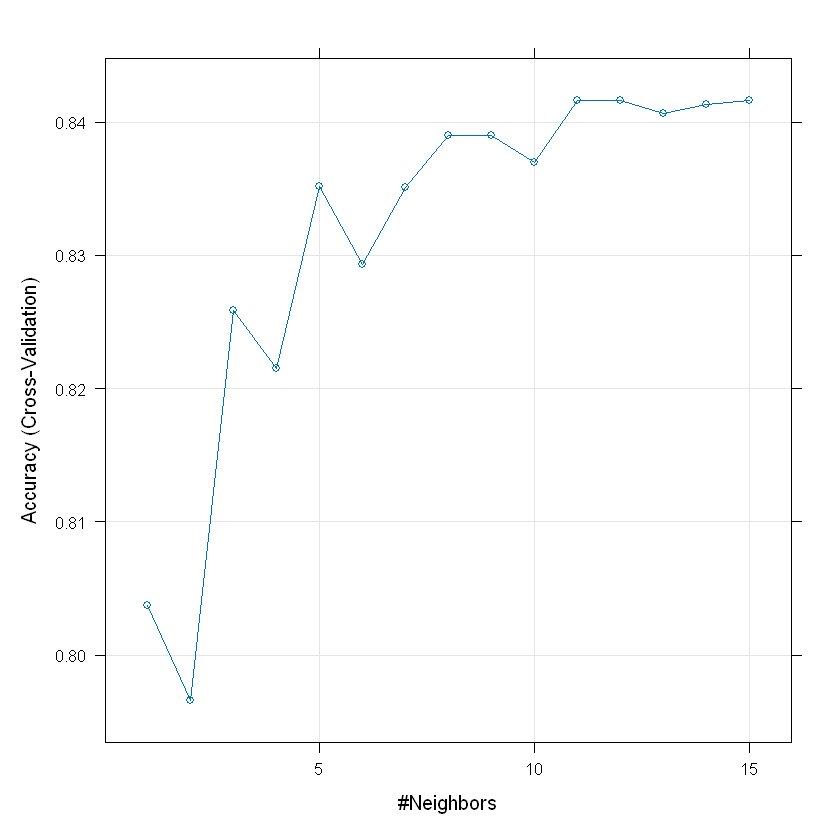

In [12]:
#variables normalizadas
knn.fit2 = train(precip ~ ., df.train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(k = 1:15))

plot(knn.fit2)
knn.fit2$bestTune

Vemos que el valor óptimo para el modelo normalizado es mayor que para el no normalizado, y que el punto en que el accuracy se estabiliza es mayor para el modelo normalizado, a partir de k=11, que para el no normalizado, en torno a k = 7. Por otro lado, comparamos ambos modelos. Para ello, representamos el RMSE en función de k para cada caso:

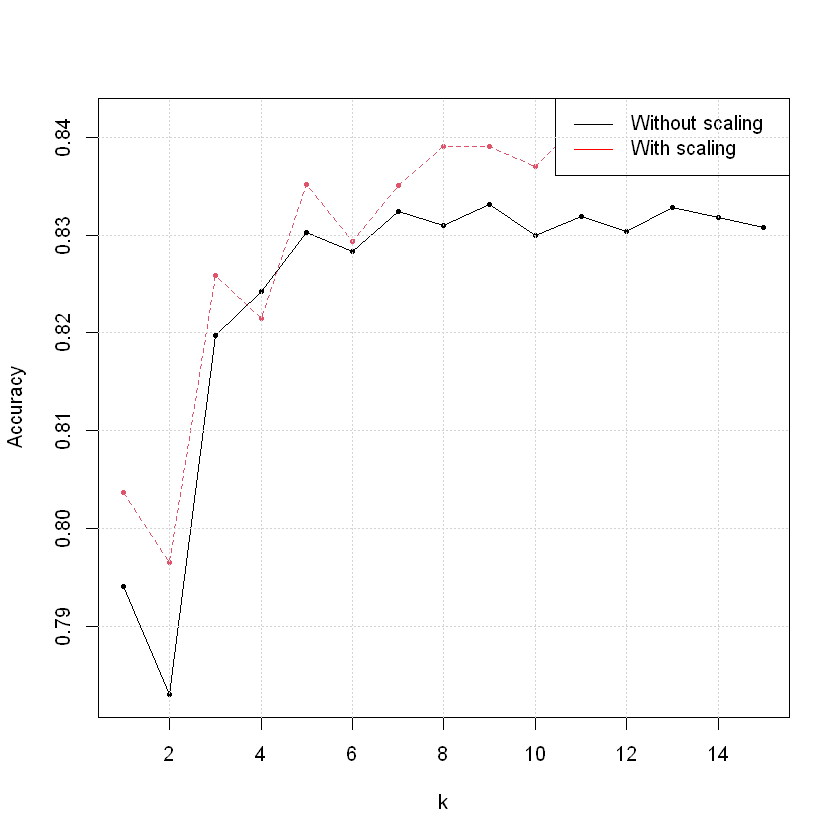

In [15]:
matplot(1:15, cbind(knn.fit$results$Accuracy, knn.fit2$results$Accuracy),
        type = "o", pch = 19, cex = 0.5, xlab = "k", ylab = "Accuracy")
legend("topright", c("Without scaling", "With scaling"), 
       col = c("black", "red"), lty = 1); grid()

Vemos que la normalización aumenta en general el accuracy, mejorando la capacidad predictiva del modelo. 

#### 

Por último, predecimos la precipitación con el modelo óptimo (k=15 y normalizado) para un conjunto de datos independiente y calculamos varias métricas de validación.

In [6]:
## validation
# RMSE
rmse <- function(x, y) {
    stopifnot(length(x) == length(y))
    sqrt(mean((x - y)^2))
}
## accuracy binary
acc.class = function(x, y) {
  stopifnot(length(x) == length(y))
  return(sum(diag(table(x, y))) / length(x))
}


In [42]:

#predicción
params.scaling = preProcess(x.train, method = c("center", "scale"))

x.test.scaled = scale(x.test, 
                    center = params.scaling$mean, scale = params.scaling$std)

knn.fit.scale = train(precip ~ ., df.train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(k=15))

pred.with.scaling = predict(knn.fit.scale, x.test.scaled)

In [53]:
#validación
pred.with.scaling2 = as.numeric(pred.with.scaling)
y.test.num = as.numeric(y.test)
rmse.val = rmse(y.test.num, pred.with.scaling2)
r = cor(y.test.num, pred.with.scaling2, method = "spearman")
bin= acc.class(y.test.num, pred.with.scaling2 )
rv = var(pred.with.scaling2) / var(y.test.num)

print(paste0("RMSE: ",rmse.val))
print(paste0("Coeficiente de correlación de Spearman: ",r))
print(paste0("Accuracy: ",bin))
print(paste0("Cociente de varianzas: ",rv))

[1] "RMSE: 0.64546193104524"
[1] "Coeficiente de correlación de Spearman: 0.153069854430494"
[1] "Accuracy: 0.58337889557135"
[1] "Cociente de varianzas: 1.26633707608789"



El coeficiente de correlación muestra una relación pequeña entre la precipitación predicha y medida. Por otro lado, el accuracy se ha reducido bastante respecto a la cross-validación hecha con el conjunto de train. Esto puede deberse a que estamos probando el modelo en un conjunto de test, por lo que el error tiende a aumentar. Además, la eficacia de KNN se reduce en dimensiones altas (Curse of Dimensionality).

### Punto 2 (3 puntos):

Dados los posibles problemas asociados a la dimensionalidad del espacio de trabajo, en adelante consideraremos como predictores las Componentes Principales en lugar de las variables originales. Para ello, obtén las CPs a partir de los predictores originales del dataset `meteo.csv`. Recuerda la necesidad (o no) de estandarizar las variables para la obtención de las CPs (`Nota:` consultar la ayuda de la función scale -> `? scale`).

A continuación, volveremos a considerar la serie de precipitación discretizada a partir del valor 1 mm y predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos a partir de las CPs. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtened el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.


#### 

In [7]:
PCA.train <- prcomp(x.train, center = TRUE, scale. = TRUE)

In [8]:

#seleccionamos subconjuntos de componentes principales de los datos para varios umbrales de varianza explicada
cum.var <- cumsum((PCA.train$sdev))/sum((PCA.train$sdev))
umbral.var <- c(0.4,0.6,0.8,0.9)
n <- length(umbral.var)
umbral.pc <- rep(NA,n)

for (i in 1:n){
    umbral.pc[i] = which(cum.var > umbral.var[i])[1]
}

In [14]:
umbral.pc

[1]  1  2  4 10

In [9]:
set.seed(1)
trctrl = trainControl(method = "cv", number = 2)

df.pc <- data.frame(y.train,PCA.train$x[,1:umbral.pc[1]])  
df.pc$y.train <- as.factor(df.pc$y.train)
colnames(df.pc)[1] = "precip"

#medidas de interes
k.opt <- rep(NA,n) #k optimo para un subgrupo de pc dado
acc.at.k.opt <- rep(NA,n) #accuracy en ese k optimo
t.eval <- rep(NA,n) #tiempo de ejecución de knn por grupo de pc
M.acc <- matrix(rep(NA, 15*n),c(n,15)) #accuracy en cada k y subrupo de pc

for (i in 1:n){
    
    if (i > 1){
        df.pc <- data.frame(df.pc,PCA.train$x[,(umbral.pc[i-1]+1):umbral.pc[i]])
    }  
    
    t1 = Sys.time()
    knn.fit3 = train(precip ~ ., df.pc ,
                    method = "knn",
                    trControl = trctrl,
                    tuneGrid = expand.grid(k = 1:15))
    t2 = Sys.time()

   
    k.opt[i] <- knn.fit3$bestTune[1,1]
    acc.at.k.opt[i] <- knn.fit3$results$Accuracy[knn.fit3$bestTune[1,1]]
    M.acc[i,] <- knn.fit3$results$Accuracy
    t.eval[i] <- difftime(t2, t1, units = "secs")
}

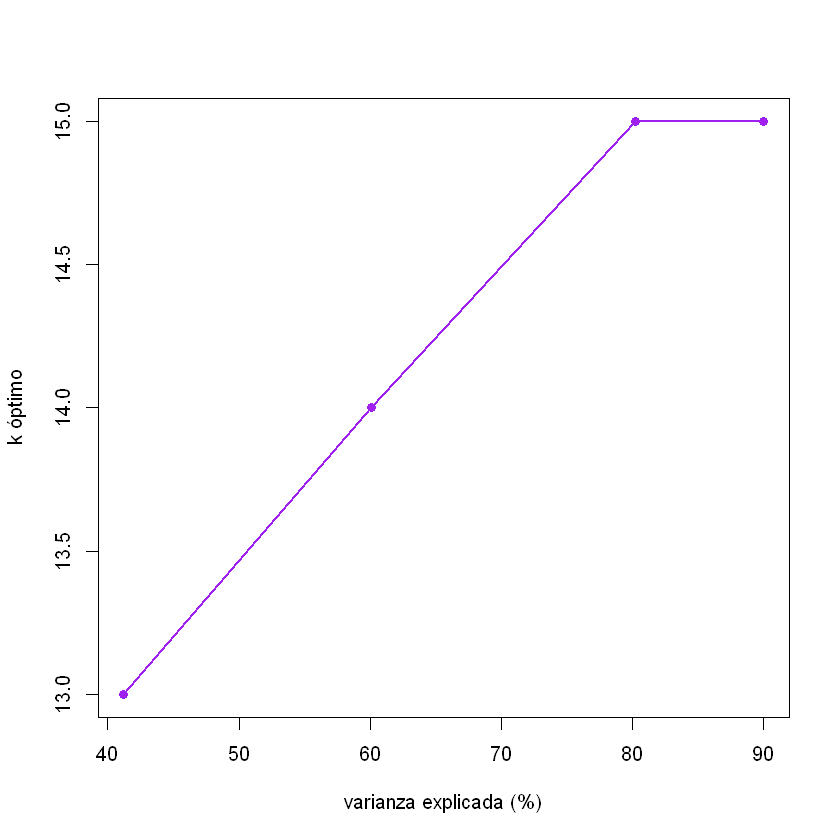

In [10]:
#efecto del porcentaje de varianza explicada en el k óptimo
plot(100*cum.var[umbral.pc],k.opt, pch = 16, col = "purple",
     xlab = "varianza explicada (%)", ylab = "k óptimo", main = "")

lines(100*cum.var[umbral.pc],k.opt, type = "l", col = "purple", lwd = 2)

Vemos que aumenta el k óptimo cuando se aumenta la varianza explicada en valores menores y a medida que aumenta la varianza asociada a las componentes principales, la configuración óptima se estabiliza en k=15.

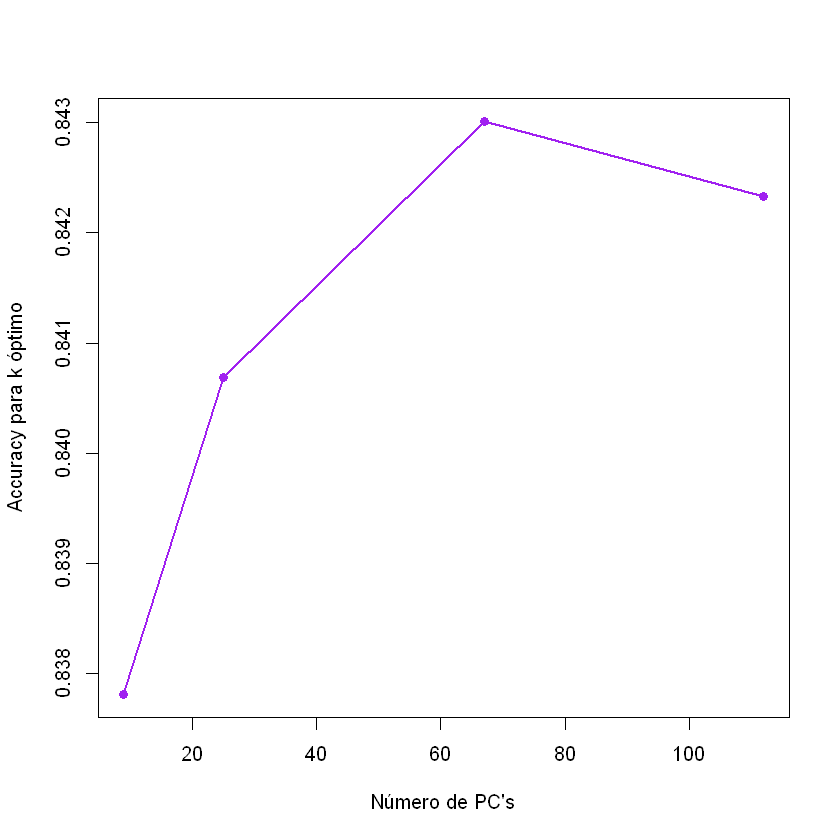

In [11]:
#número óptimo de componentes principales
plot(umbral.pc,acc.at.k.opt, pch = 16, col = "purple",
     xlab = "Número de PC's", ylab = "Accuracy para k óptimo", main = "")

lines(umbral.pc,acc.at.k.opt, type = "l", col = "purple", lwd = 2)

Vemos que el accuracy obtenido en la cross-validación alcanza el máximo en el tercer grupo de PC's. De todas formas, la diferencia medida en accuracy entre el máximo y el mínimo número de PC's no llega al 1%, con lo que 9 componentes principales puede ser una buena opción, teniendo en cuenta que el tiempo de computación es bastante menor:

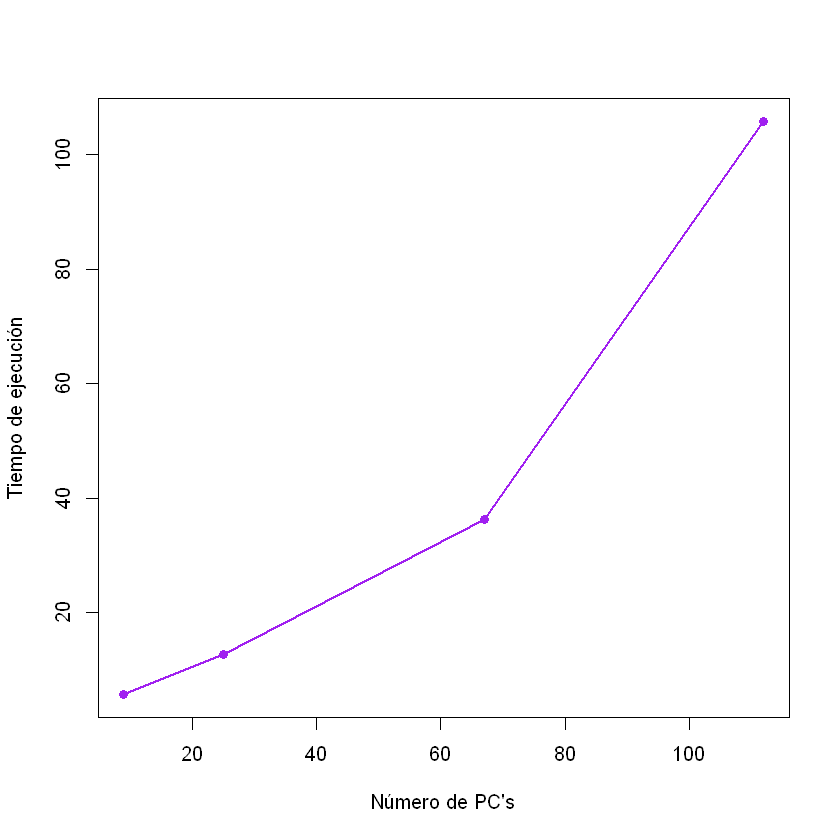

In [12]:
#tiempo de computación 
plot(umbral.pc,t.eval, pch = 16, col = "purple",
     xlab = "Número de PC's", ylab = "Tiempo de ejecución", main = "")

lines(umbral.pc,t.eval, type = "l", col = "purple", lwd = 2)

#### 

In [9]:
#scaling
params.scaling = preProcess(x.test, method = c("center", "scale"))
x.test.scaled = scale(x.test, 
                     center = params.scaling$mean, scale = params.scaling$std)
PCA.test = x.test.scaled %*% PCA.train$rotation

In [14]:
##k=13 y 9 PC's
df.pc <- data.frame(y.train,PCA.train$x[,1:umbral.pc[1]])  
df.pc$y.train <- as.factor(df.pc$y.train)
colnames(df.pc)[1] = "precip"

knn.fit4 = train(precip ~ ., df.pc ,
                    method = "knn",
                    trControl = trctrl,
                    tuneGrid = expand.grid(k = 13))


In [15]:
pred.test = predict(knn.fit4, PCA.test[,1:umbral.pc[1]])

In [16]:
#validación
y.test.num = as.numeric(y.test)
pred.test.num = as.numeric(pred.test)
rmse.val = rmse(y.test.num, pred.test.num)
r = cor(y.test.num, pred.test.num, method = "spearman")
bin= acc.class(y.test.num, pred.test.num )
rv = var(pred.test.num) / var(y.test.num)

print(paste0("RMSE: ",rmse.val))
print(paste0("Coeficiente de correlación de Spearman: ",r))
print(paste0("Accuracy: ",bin))
print(paste0("Cociente de varianzas: ",rv))

[1] "RMSE: 0.397848230951847"
[1] "Coeficiente de correlación de Spearman: 0.583606752579477"
[1] "Accuracy: 0.841716785128485"
[1] "Cociente de varianzas: 0.919509036803225"


Se obtiene un accuracy similar al accuracy en cross-validación. En comparación al primer punto, se han mejorado los resultados gracias a la reducción de la dimensión.

### Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 
* ¿Cómo cambian los errores sobre el conjunto de test en este caso?
* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?



In [10]:
data = read.csv("meteo.csv")
precip20 =  ifelse(data[,2] < 20, 0, 1)
precip20 = as.factor(precip20)
df = data.frame(pr20 = precip20,df)
rm(data)

In [11]:
y20 = df[, 1]  

In [12]:
#particion train/test

df.train = df[indtrain, ]
y20.train = y20[indtrain]
df.test = df[indtest, ]
y20.test = y20[indtest]

In [13]:
trctrl = trainControl(method = "cv", number = 2)

df.pc <- data.frame(y20.train,PCA.train$x[,1:umbral.pc[1]])  
colnames(df.pc)[1] = "pr20"

In [20]:
set.seed(1)


#medidas de interes
k.opt20 <- rep(NA,n) #k optimo para un subgrupo de pc dado
acc.at.k.opt20 <- rep(NA,n) #accuracy en ese k optimo
t.eval20 <- rep(NA,n) #tiempo de ejecución de knn por grupo de pc
M.acc20 <- matrix(rep(NA, 15*n),c(n,15)) #accuracy en cada k y subrupo de pc

for (i in 1:n){
    
    if (i > 1){
        df.pc <- data.frame(df.pc,PCA.train$x[,(umbral.pc[i-1]+1):umbral.pc[i]])
    }  
    
    t1 = Sys.time()
    knn.fit3 = train(pr20 ~ ., df.pc ,
                    method = "knn",
                    trControl = trctrl,
                    tuneGrid = expand.grid(k = 1:15))
    t2 = Sys.time()

   
    k.opt20[i] <- knn.fit3$bestTune[1,1]
    acc.at.k.opt20[i] <- knn.fit3$results$Accuracy[knn.fit3$bestTune[1,1]]
    M.acc20[i,] <- knn.fit3$results$Accuracy
    t.eval20[i] <- difftime(t2, t1, units = "secs")
}

#### 
Evaluamos el k óptimo y el correspondiente accuracy para cada conjunto de componentes principales:

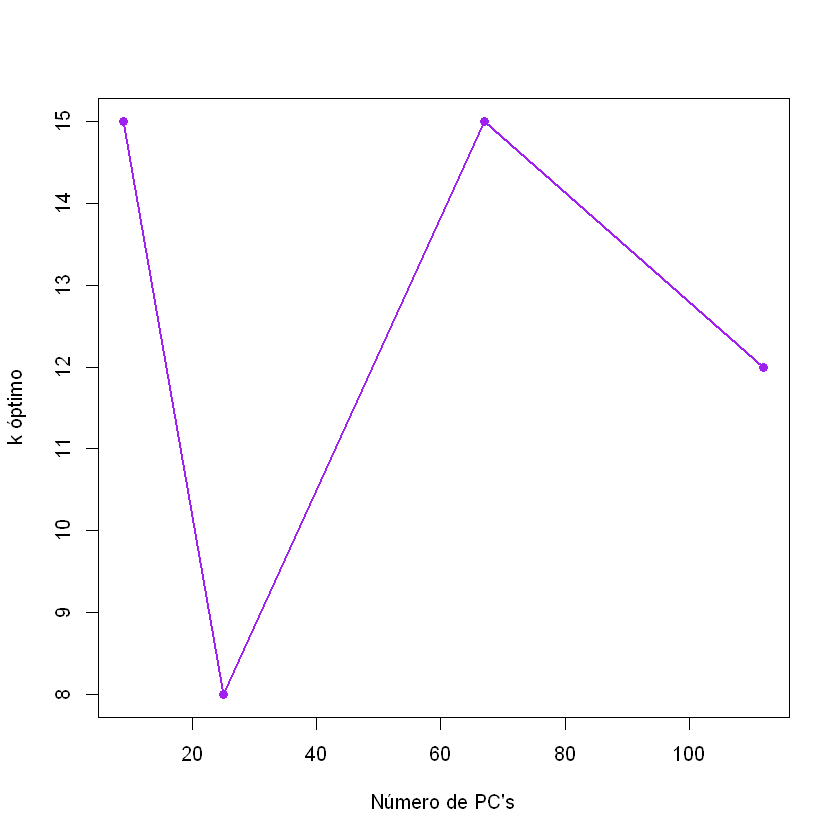

In [21]:
#efecto del número de PC's en el k óptimo
plot(umbral.pc,k.opt20, pch = 16, col = "purple",
     xlab = "Número de PC's", ylab = "k óptimo", main = "")

lines(umbral.pc,k.opt20, type = "l", col = "purple", lwd = 2)

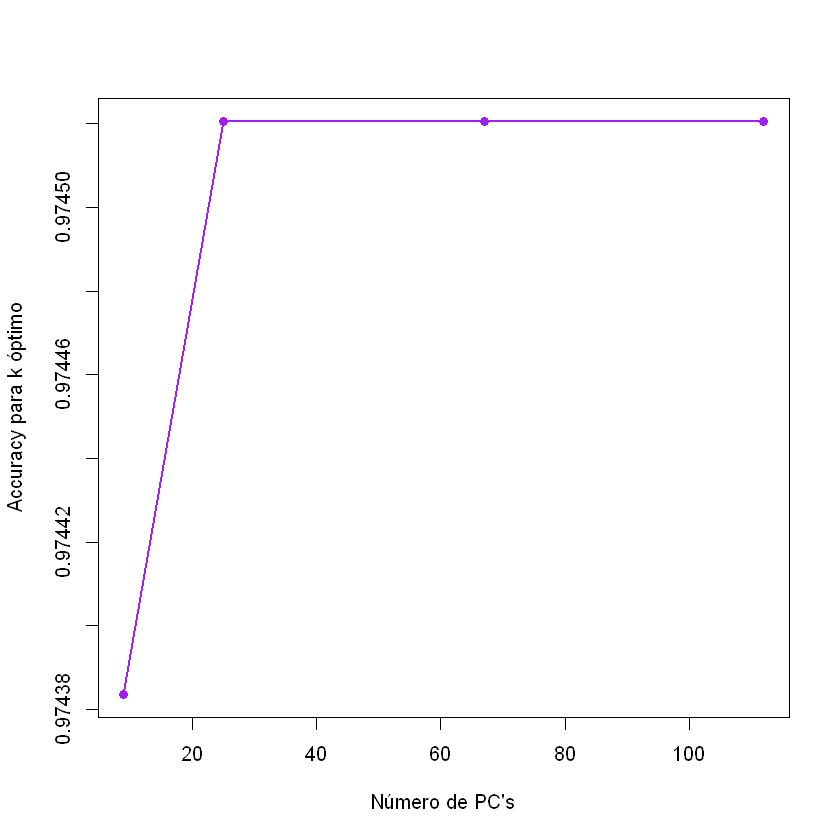

In [22]:
#accuracy en función del número de PC's
plot(umbral.pc,acc.at.k.opt20, pch = 16, col = "purple",
     xlab = "Número de PC's", ylab = "Accuracy para k óptimo", main = "")

lines(umbral.pc,acc.at.k.opt20, type = "l", col = "purple", lwd = 2)

En este caso vemos resultados diferentes: k alcanza un valor más bajo, 8, aunque en general se mantiene en torno al 15. Por otro lado, la máxima precisión se alcanza a partir del segundo grupo de PC's, aunque el accuracy tiene valores parecidos en todos los casos.

#### 

Tomamos 9 componentes principales, y el correspondiente k, k=15, por tener un accuracy similar al accuracy máximo. Con esta configuración ensayamos sobre el test:

In [14]:
##k=13 y 9 PC's
df.pc <- data.frame(y20.train,PCA.train$x[,1:umbral.pc[1]])  
colnames(df.pc)[1] = "pr20"

trctrl = trainControl(method = "cv", number = 2)
knn.fit5 = train(pr20 ~ ., df.pc ,
                    method = "knn",
                    trControl = trctrl,
                    tuneGrid = expand.grid(k = 15))

In [15]:
pred.test20 = predict(knn.fit5, PCA.test[,1:umbral.pc[1]])

In [16]:
#validación
y20.test.num = as.numeric(y20.test)
pred.test20.num = as.numeric(pred.test20)
rmse.val = rmse(y20.test.num, pred.test20.num)
r = cor(y20.test.num, pred.test20.num, method = "spearman")
bin= acc.class(y20.test.num, pred.test20.num )
rv = var(pred.test20.num) / var(y20.test.num)

print(paste0("RMSE: ",rmse.val))
print(paste0("Coeficiente de correlación de Spearman: ",r))
print(paste0("Accuracy: ",bin))
print(paste0("Cociente de varianzas: ",rv))

Warning message in cor(y20.test.num, pred.test20.num, method = "spearman"):
"the standard deviation is zero"


[1] "RMSE: 0.15944820103582"
[1] "Coeficiente de correlación de Spearman: NA"
[1] "Accuracy: 0.974576271186441"
[1] "Cociente de varianzas: 0"


Se observa una mejor del error de test respecto del test hecho sobre la precipitación discretizada en el valor 0.1 mm.

#### 

In [17]:
print('Proporción de dias con lluvia por encima de los 0.1 mm')
sum(as.numeric(y.test)-1)/length(y.test)

[1] "Proporción de dias con lluvia por encima de los 0.1 mm"


[1] 0.2687261

In [18]:

print('Proporción de dias con lluvia por encima de los 20 mm')
sum(as.numeric(y20.test)-1)/length(y20.test)

[1] "Proporción de dias con lluvia por encima de los 20 mm"


[1] 0.02542373

In [21]:
unique(pred.test20.num)

[1] 1

El accuracy obtenido está en torno a los 0.975, es decir, los casos mal predichos son el 0.025 de los casos. Atendientdo a la proporción de días con lluvia por encima de los 20 mm, vemos que estos valores son prácticamente iguales. Una posible explicación es que, al ser los días de lluvia intensa poco frecuentes, el algoritmo de knn les ha dado poco peso y siempre se han clasificado como días de menos lluvia. Esto muestra cómo el accuracy en este caso no está representando la precisión de la predicción, y que hay que tener en cuenta la estructura de los datos para aplicar un algoritmo u otro.

### Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?